<a href="https://colab.research.google.com/github/WayneNcube19/Climate-Data-Analysis/blob/main/Copy_of_GHG_Emission_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
 from io import BytesIO
import urllib, zipfile, requests
 
r = urllib.request.urlopen('https://wri-sites.s3.amazonaws.com/climatewatch.org/www.climatewatch.org/climate-watch/climate-watch-download-zip/ghg-emissions.zip')
with zipfile.ZipFile(BytesIO(r.read())) as z:
    print( z.namelist() )
    z.extractall()

['CW_CAIT_GHG_Emissions.xlsx', 'CW_GCP_CO2_Emissions.xlsx', 'CW_PIK_GHG_Emissions.xlsx', 'CW_UNFCCC_GHG_Emissions.xlsx', 'Readme.pdf']


In [5]:
 import pandas as pd
from matplotlib import pyplot as plt
 
df = pd.read_excel('CW_CAIT_GHG_Emissions.xlsx', index_col='Country')
df

,Source,Sector,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFG,CAIT,Total excluding LUCF,All GHG,15.1377,15.0550,13.5994,13.4311,13.2379,13.4476,14.3981,15.2992,16.0535,16.8867,15.0502,13.4656,16.0978,16.7768,16.3469,17.0935,20.7413,24.7830,31.3933,37.7192,44.7496,58.6185,67.0486,76.2890,86.6014,93.5370,96.5867
AFG,CAIT,Total including LUCF,All GHG,15.1377,15.0550,13.5994,13.4311,13.2379,13.4476,14.3981,15.2992,16.0535,16.8867,15.0502,13.4656,16.0978,16.7768,16.3469,17.0935,20.7413,24.7830,31.3933,37.7192,44.7496,58.6185,67.0486,76.2890,86.6014,93.5370,96.5867
AFG,CAIT,Energy,All GHG,5.7703,5.2736,3.7116,3.3758,3.0547,2.7409,2.6123,2.4654,2.3478,2.0689,1.9916,2.0115,2.2585,2.3516,2.0821,2.4427,6.0242,9.9026,15.0853,20.9019,25.8391,39.4925,47.8844,57.0128,66.6577,74.5165,77.1274
AFG,CAIT,Industrial Processes,All GHG,0.0519,0.0545,0.0601,0.0627,0.0653,0.0680,0.0817,0.0954,0.1092,0.1229,0.1100,0.1159,0.1247,0.1365,0.1424,0.1424,0.1625,0.1768,0.2027,0.2230,0.2489,0.3139,0.3790,0.4499,0.5346,0.5921,0.7448
AFG,CAIT,Agriculture,All GHG,8.0869,8.4105,8.4235,8.5005,8.5380,8.9711,9.9775,10.9527,11.7520,12.7912,10.9860,9.2833,11.5673,12.0491,11.7907,12.0842,12.0528,12.1242,13.4483,13.8596,15.8493,15.9058,15.7849,15.7320,16.2207,15.1461,15.3491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,CAIT,Other Fuel Combustion,N2O,0.4078,0.4171,0.4264,0.4357,0.4450,0.5876,0.7300,0.8725,1.0150,1.1574,1.2999,1.1957,1.0916,0.9875,0.8833,0.7792,0.8036,0.8280,0.8524,0.8768,0.9013,1.0232,1.1452,1.2672,1.3892,1.5112,1.5369
ZWE,CAIT,Fugitive Emissions,N2O,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
ZWE,CAIT,Total excluding LUCF,F-Gas,0.0676,0.0647,0.0619,0.0590,0.0561,0.0533,0.0723,0.0914,0.1105,0.1295,0.1486,0.1604,0.1722,0.1840,0.1958,0.2076,0.2309,0.2542,0.2774,0.3007,0.3240,0.3794,0.4348,0.4902,0.5456,0.6010,0.6656


In [6]:
clean_df_including_LUCF = df[df.Sector == 'Total including LUCF']
clean_df_all_ghg = clean_df_including_LUCF[clean_df_including_LUCF.Gas == 'All GHG']
clean_df_all_ghg_transposed = clean_df_all_ghg.transpose()
clean_df_all_ghg_transposed = clean_df_all_ghg_transposed.drop(['Source', 'Sector','Gas'])
clean_df_all_ghg_transposed

Country,AFG,AGO,ALB,AND,ARE,ARG,ARM,ATG,AUS,AUT,AZE,BDI,BEL,BEN,BFA,BGD,BGR,BHR,BHS,BIH,BLR,BLZ,BOL,BRA,BRB,BRN,BTN,BWA,CAF,CAN,CHE,CHL,CHN,CIV,CMR,COD,COG,COK,COL,COM,...,SGP,SLB,SLE,SLV,SOM,SRB,STP,SUR,SVK,SVN,SWE,SWZ,SYC,SYR,TCD,TGO,THA,TJK,TKM,TON,TTO,TUN,TUR,TUV,TZA,UGA,UKR,URY,USA,UZB,VCT,VEN,VNM,VUT,WORLD,WSM,YEM,ZAF,ZMB,ZWE
1990,15.1377,150.592,11.4308,0.4112,68.5679,329.737,24.3948,0.4105,511.197,64.2211,75.5594,12.446,126.703,19.9946,22.8632,116.288,89.9884,14.0754,0.8096,22.2382,126.041,13.2087,110.127,1496.21,3.1791,15.8267,-2.9285,61.1796,52.3233,662.909,50.7704,35.5593,2901.78,5.0814,136.696,203.645,38.0434,-0.0029,273.461,0.3306,...,31.6208,2.0788,11.0327,8.0376,40.9155,77.3627,0.0927,6.9681,57.0519,10.9838,48.038,2.3806,0.2163,56.9507,24.9963,10.9021,174.513,17.8598,80.1702,0.2484,15.4383,19.1978,184.84,0.0167,289.591,40.4734,874.784,3.2305,5669.59,193.423,0.051,303.154,25.6389,0.4694,34967.3,-1.7067,12.3756,315.932,485.473,71.0492
1991,15.055,151.267,9.0314,0.4131,75.1264,334.378,25.0751,0.4056,511.081,68.4518,84.6076,12.5367,131.755,20.0798,23.3445,116.537,68.9581,13.7706,0.6426,19.6284,120.894,13.3708,110.85,1523.47,3.3493,15.4097,-2.8748,60.5903,53.0905,657.877,53.0024,34.641,3051.32,10.8212,136.4,202.492,40.3186,-0.0029,275.188,0.3361,...,34.8016,2.0863,11.0609,8.9148,38.0453,67.0575,0.0943,7.3221,48.9863,9.9409,48.6647,2.3265,0.2401,61.3589,25.1925,10.6792,186.49,17.0365,70.9357,0.267,14.3458,20.2011,187.287,0.0175,289.719,41.0183,829.177,4.8213,5627.95,199.132,0.0475,304.966,28.5056,0.4834,35125.4,-1.7022,13.9715,311.917,484.934,71.3533
1992,13.5994,151.615,6.9489,0.4149,73.6912,338.742,14.8524,0.4101,513.325,62.7159,60.8281,12.5801,129.88,20.1901,23.6439,118.344,63.9066,15.7972,0.6531,12.1265,107.743,13.5157,112.649,1533.44,3.1614,15.7496,-2.88,60.8905,53.5832,673.686,52.9406,36.9892,3182.67,16.4325,136.41,202.911,40.2027,-0.0024,278.94,0.3407,...,37.3598,2.089,10.9772,9.3289,36.1176,61.8027,0.0959,7.433,46.4885,9.6708,51.2568,2.3244,0.241,62.509,25.4465,10.4148,198.433,14.0078,56.9443,0.2447,13.3384,21.0005,194.72,0.0176,289.744,41.3444,739.384,6.4341,5709.17,189.448,0.0563,308.978,31.0149,0.5031,34985.5,-1.7023,14.8023,308.892,484.271,72.2043
1993,13.4311,152.367,6.9508,0.4203,76.5759,338.807,8.6785,0.4262,512.998,62.6263,69.0545,12.6091,127.917,20.3071,23.8841,119.608,62.3395,16.6946,0.5628,8.6427,94.945,13.6412,114.346,1543.62,3.3381,16.1783,-2.911,60.5273,54.0697,672.18,50.4345,38.4359,3405.73,22.1365,140.538,203.322,40.1846,0.0047,282.865,0.3494,...,44.299,2.0954,11.0639,9.8902,38.1195,56.0135,0.0967,7.3466,43.8123,10.4569,51.1617,2.0153,0.2537,63.0148,25.7712,10.3346,214.554,11.1416,54.0163,0.259,13.8847,22.5489,201.228,0.0174,290.234,41.7781,650.265,6.9526,5819.34,221.563,0.0793,315.257,37.6667,0.5299,35079.6,-1.6978,13.9286,317.247,483.032,68.7029
1994,13.2379,152.557,7.733,0.4185,83.2178,348.844,6.2287,0.4315,516.029,62.7059,62.5008,12.5522,133.381,20.5888,24.3667,122.08,58.4813,17.1419,0.5528,-1.6017,81.8584,13.7599,116.405,1559.95,3.0135,16.5181,-2.8843,60.8689,57.018,692.69,49.615,41.9297,3556.72,27.9348,197.044,203.61,39.967,0.0063,284.926,0.3515,...,47.8547,2.0968,11.0412,10.5266,40.0849,52.3473,0.098,7.378,41.1055,10.4802,53.0086,2.3833,0.2739,66.3946,25.9865,10.5945,229.293,8.6554,58.1752,0.2647,14.4513,22.5481,196.41,0.0175,290.425,41.5405,555.009,6.8583,5906.32,199.503,0.099,318.015,43.2889,0.5361,35287.6,-1.659,14.3442,323.242,481.413,68.384
1995,13.4476,156.889,7.476,0.4386,89.6853,351.329,6.8032,0.4474,524.111,65.1178,60.4621,12.6342,133.458,20.4367,24.7173,127.095,59.6747,18.0036,0.5535,-1.7072,73.8426,12.6651,116.026,1579.96,3.1046,17.0561,-2.7862,61.79,57.5842,708.889,50.5777,45.5125,3946.2,27.7118,197.077,203.57,40.1001,0.0077,287.907,0.3589,...,49.1973,2.1064,10.823,10.7901,40.7597,58.8751,0.0992,7.4263,41.6626,11.4077,52.4919,2.3975,0.272,70.5171,26.3982,10.6353,248.466,8.1425,60.1547,0.2579,14.6221,23.1791,211.005,0.0175,294.354,42.3103,524.368,7.0909,5970.68,189.442,0.1066,

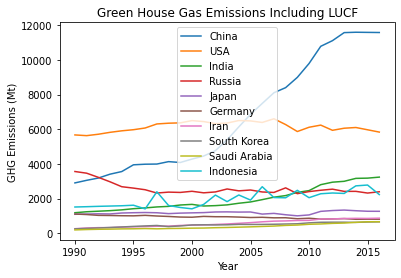

In [7]:
x_axis = clean_df_all_ghg_transposed.index
 
china  = clean_df_all_ghg_transposed.CHN
usa = clean_df_all_ghg_transposed.USA
india = clean_df_all_ghg_transposed.IND
russia = clean_df_all_ghg_transposed.RUS
japan = clean_df_all_ghg_transposed.JPN
germany = clean_df_all_ghg_transposed.DEU
iran = clean_df_all_ghg_transposed.IRN
south_korea = clean_df_all_ghg_transposed.KOR
saudi_arabia = clean_df_all_ghg_transposed.SAU
indonesia = clean_df_all_ghg_transposed.IDN
 
plt.plot(x_axis,china)
plt.plot(x_axis,usa)
plt.plot(x_axis,india)
plt.plot(x_axis,russia)
plt.plot(x_axis,japan)
plt.plot(x_axis,germany)
plt.plot(x_axis,iran)
plt.plot(x_axis,south_korea)
plt.plot(x_axis,saudi_arabia)
plt.plot(x_axis,indonesia)
 
plt.legend(['China', 'USA', 'India', 'Russia', 'Japan', 'Germany', 'Iran', 'South Korea', 'Saudi Arabia', 'Indonesia'])
plt.title('Green House Gas Emissions Including LUCF')
plt.xlabel('Year')
plt.ylabel('GHG Emissions (Mt)')
 
plt.savefig('/content/drive/MyDrive/topEmitters.png')
plt.show()